In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 假设您的数据已经保存在一个CSV文件中，读取数据
data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')

# 生成LN_AUDIENCE变量
data['LN_AUDIENCE'] = np.log(data['Audience'] + 1)  # 假设Audience是票数

# 将所有变量名转换为大写
data.columns = map(str.upper, data.columns)

# 变量名称对照
variables = {
    'PlayID': 'PLAYID',
    'MovieID': 'MOVIEID',
    'PlayWeek': 'PLAYWEEK',
    'Weekend': 'WEEKEND',
    'Play_nWeek': 'PLAY_NWEEK',
    'PlayMonth': 'PLAYMONTH',
    'PlayYear': 'PLAYYEAR',
    'ViewDay': 'VIEWDAY',
    'CutBack': 'CUTBACK',
    'GHA_View_Code': 'GHA_VIEW_CODE',
    'TFF_View_Code': 'TFF_VIEW_CODE',
    'Theater_Class': 'THEATER_CLASS',
    'Audience': 'AUDIENCE',
    'Tempture': 'TEMPERATURE',
    'Rainfall': 'RAINFALL',
    'No_Weather': 'NO_WEATHER',
    'MovieFest': 'MOVIEFEST',
    'Rated': 'RATED',
    'Class_Darma': 'CLASS_DARMA',
    'Class_Comedy': 'CLASS_COMEDY',
    'Class_Action': 'CLASS_ACTION',
    'Class_Documentary': 'CLASS_DOCUMENTARY',
    'Class_Animation': 'CLASS_ANIMATION',
    'Class_Other': 'CLASS_OTHER',
    'Class_#N/A': 'CLASS_NA',
    'Movie_Length': 'MOVIE_LENGTH',
    'No_Movie_Length': 'NO_MOVIE_LENGTH',
    'Director_Award': 'DIRECTOR_AWARD',
    'Producer_Famous': 'PRODUCER_FAMOUS',
    'Distrbutor': 'DISTRIBUTOR',
    'Budget': 'BUDGET',
    'No_Budget': 'NO_BUDGET',
    'Actor_Awardall': 'ACTOR_AWARDALL',
    'Subsidy_Amount': 'SUBSIDY_AMOUNT',
    'Subsidy_Yes': 'SUBSIDY_YES',
    'IMDb_rating': 'IMDB_RATING',
    'No_IMDb': 'NO_IMDB',
    'Oscar_Nom': 'OSCAR_NOM',
    'Oscar_AwardTotal': 'OSCAR_AWARDTOTAL',
    'No_Oscar': 'NO_OSCAR',
    'Cannes_Nom': 'CANNES_NOM',
    'Cannes_AwardTotal': 'CANNES_AWARDTOTAL',
    'No_Cannes': 'NO_CANNES',
    'GHA_Nom': 'GHA_NOM',
    'GHA_AwardTotal': 'GHA_AWARDTOTAL',
    'No_GHA': 'NO_GHA',
    'TFF_Nom': 'TFF_NOM',
    'TFF_AwardTotal': 'TFF_AWARDTOTAL',
    'No_TFF': 'NO_TFF',
    'TFF_NomData': 'TFF_NOMDATA',
    'view_afhorse': 'VIEW_AFHORSE',
    'view_aftaipei': 'VIEW_AFTAIPEI',
    'year_2018': 'YEAR_2018',
    'year_2019': 'YEAR_2019',
    'year_2020': 'YEAR_2020',
    'year_2021': 'YEAR_2021',
    'year_2022': 'YEAR_2022',
    'month_2': 'MONTH_2',
    'month_3': 'MONTH_3',
    'month_4': 'MONTH_4',
    'month_5': 'MONTH_5',
    'month_6': 'MONTH_6',
    'month_7': 'MONTH_7',
    'month_8': 'MONTH_8',
    'month_9': 'MONTH_9',
    'month_10': 'MONTH_10',
    'month_11': 'MONTH_11',
    'month_12': 'MONTH_12',
    'view_week_1': 'VIEW_WEEK_1',
    'view_week_2': 'VIEW_WEEK_2',
    'view_week_3': 'VIEW_WEEK_3',
    'view_week_4': 'VIEW_WEEK_4',
    'view_week_58': 'VIEW_WEEK_58',
    'view_week_912': 'VIEW_WEEK_912',
    'theater_1': 'THEATER_1',
    'theater_2': 'THEATER_2',
    'theater_3': 'THEATER_3',
    'theater_4': 'THEATER_4',
    'rate_1': 'RATE_1',
    'rate_2': 'RATE_2',
    'rate_3': 'RATE_3',
    'rate_4': 'RATE_4',
    'distributor_1': 'DISTRIBUTOR_1',
    'distributor_2': 'DISTRIBUTOR_2',
    'distributor_3': 'DISTRIBUTOR_3',
    'lnsubsidy': 'LNSUBSIDY',
    'lnbudget': 'LNBUDGET'
}

# 特征和目标变量
X = data[['LN_AUDIENCE', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY',
          'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH',
          'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI',
          'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3',
          'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11',
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2',
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]
y = data['IMDB_RATING']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练Lasso回归模型
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression")
print("R^2 Score:", r2_score(y_test, y_pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))

# 训练Ridge回归模型
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))

# 训练Elastic Net回归模型
elasticnet = ElasticNet(alpha=1.0)
elasticnet.fit(X_train, y_train)

y_pred_elasticnet = elasticnet.predict(X_test)
print("Elastic Net Regression")
print("R^2 Score:", r2_score(y_test, y_pred_elasticnet))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_elasticnet))


Lasso Regression
R^2 Score: 0.0869768009798183
Mean Squared Error: 3.3631680372760355
Ridge Regression
R^2 Score: 0.35635979462711087
Mean Squared Error: 2.3708818883670397
Elastic Net Regression
R^2 Score: 0.08779628776962045
Mean Squared Error: 3.3601494154256923


In [2]:
data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# 定义参数网格
param_grid = {'alpha': np.logspace(-6, 6, 13)}

# 使用交叉验证来选择最佳的超参数
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

print("Best parameters found: ", ridge_cv.best_params_)
print("Best cross-validation score: ", ridge_cv.best_score_)

# 使用最佳参数训练 Ridge 回归模型
best_ridge = ridge_cv.best_estimator_
y_pred_best_ridge = best_ridge.predict(X_test)

print("Ridge Regression with best alpha")
print("R^2 Score:", r2_score(y_test, y_pred_best_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best_ridge))


Best parameters found:  {'alpha': 0.1}
Best cross-validation score:  0.3526127038785682
Ridge Regression with best alpha
R^2 Score: 0.35637657356266794
Mean Squared Error: 2.370820082292642


In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 假設你的dataframe名為 'data'
# 將列名轉換為大寫
data.columns = map(str.upper, data.columns)

# 指定依變數和自變數
y = data['IMDB_RATING']
X = data[['LN_AUDIENCE', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 
          'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 
          'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 
          'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 
          'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]

# 添加常數項到自變數
X = sm.add_constant(X)

# 擬合OLS模型
model = sm.OLS(y, X).fit()

# 打印模型摘要
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            IMDB_RATING   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     994.6
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:33:39   Log-Likelihood:            -1.3776e+05
No. Observations:               74232   AIC:                         2.756e+05
Df Residuals:                   74190   BIC:                         2.760e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.2886      0.05

In [45]:

# 計算每個特徵的VIF值
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 對VIF值進行排序
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# 打印VIF值
print(vif_data)


              feature        VIF
0               const  93.144474
38             RATE_1   2.909530
21          YEAR_2022   2.525174
20          YEAR_2021   2.501981
19          YEAR_2020   2.407264
5         CLASS_DARMA   2.322786
40             RATE_3   2.132208
15       VIEW_AFHORSE   2.114630
8   CLASS_DOCUMENTARY   2.043861
6        CLASS_COMEDY   2.006929
17          YEAR_2018   1.965697
18          YEAR_2019   1.950920
39             RATE_2   1.939558
10        CLASS_OTHER   1.925070
22            MONTH_2   1.717046
32        VIEW_WEEK_1   1.711690
29            MONTH_9   1.691613
33        VIEW_WEEK_2   1.626137
30           MONTH_10   1.583167
31           MONTH_11   1.557949
28            MONTH_8   1.522823
34        VIEW_WEEK_3   1.488158
23            MONTH_3   1.474616
13    PRODUCER_FAMOUS   1.413382
24            MONTH_4   1.383253
27            MONTH_7   1.341824
35        VIEW_WEEK_4   1.339037
25            MONTH_5   1.334023
11       MOVIE_LENGTH   1.312634
41      DI

1. 用存活分析去觀察電影票房壽命(ViewDay) 
2. DID 去評估有沒有獲獎對票房的影響(這可能只能用沒有缺失值的資料 就是要刪資料) 
3. 分量迴歸去跑 IMDB在不同票房水準的評價 
4. 特徵價格法評估 不同類型電影在票房的貢獻度

<Axes: xlabel='timeline'>

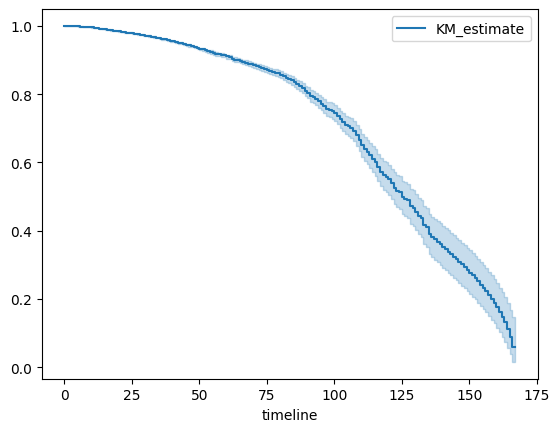

In [15]:
# 存活分析
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
# Convert column names to uppercase
data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')

data.columns = map(str.upper, data.columns)

# Survival Analysis using Kaplan-Meier
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(data['VIEWDAY'], event_observed=data['AUDIENCE'] == 0)

# Plot the survival function
kmf.plot_survival_function()

## 隨著時間增加，票房生存概率逐漸下降，表明隨著上映時間的延長，票房收入逐漸減少。這是預期的，因為大多數電影的票房收入在上映初期最高，然後逐漸減少。

In [16]:
# DID
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')

# Convert column names to uppercase
data.columns = map(str.upper, data.columns)

# Create the treatment and post event variables
data['AWARDED'] = (data['GHA_VIEW_CODE'] == 4) | (data['TFF_VIEW_CODE'] == 4)
data['POST_EVENT'] = data['VIEWDAY'] > data['VIEWDAY'].median()

# Interaction term
data['AWARDED_POST_EVENT'] = data['AWARDED'] * data['POST_EVENT']

# DID Regression
model = ols('AUDIENCE ~ AWARDED + POST_EVENT + AWARDED_POST_EVENT', data=data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               AUDIENCE   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     407.3
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          1.84e-262
Time:                        19:09:54   Log-Likelihood:            -4.8818e+05
No. Observations:               74232   AIC:                         9.764e+05
Df Residuals:                   74228   BIC:                         9.764e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [8]:
# 分量迴歸
import pandas as pd
import statsmodels.formula.api as smf

data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')

# Convert column names to uppercase
data.columns = map(str.upper, data.columns)

# Quantile regression at different quantiles
quantiles = [0.25, 0.5, 0.75]
results = []

for q in quantiles:
    mod = smf.quantreg('IMDB_RATING ~ LN_AUDIENCE + WEEKEND + CUTBACK + MOVIEFEST + CLASS_DARMA + CLASS_COMEDY + CLASS_ACTION + CLASS_DOCUMENTARY + CLASS_ANIMATION + CLASS_OTHER + MOVIE_LENGTH + DIRECTOR_AWARD + PRODUCER_FAMOUS + ACTOR_AWARDALL + VIEW_AFHORSE + VIEW_AFTAIPEI + YEAR_2018 + YEAR_2019 + YEAR_2020 + YEAR_2021 + YEAR_2022 + MONTH_2 + MONTH_3 + MONTH_4 + MONTH_5 + MONTH_6 + MONTH_7 + MONTH_8 + MONTH_9 + MONTH_10 + MONTH_11 + VIEW_WEEK_1 + VIEW_WEEK_2 + VIEW_WEEK_3 + VIEW_WEEK_4 + THEATER_1 + THEATER_2 + RATE_1 + RATE_2 + RATE_3 + DISTRIBUTOR_1', data)
    res = mod.fit(q=q)
    results.append((q, res))

# Print summary for each quantile
for q, res in results:
    print(f'Quantile: {q}')
    print(res.summary())


Quantile: 0.25
                         QuantReg Regression Results                          
Dep. Variable:            IMDB_RATING   Pseudo R-squared:               0.3805
Model:                       QuantReg   Bandwidth:                     0.06893
Method:                 Least Squares   Sparsity:                        1.179
Date:                Sat, 01 Jun 2024   No. Observations:                74232
Time:                        19:39:47   Df Residuals:                    74190
                                        Df Model:                           41
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7020      0.017    155.142      0.000       2.668       2.736
LN_AUDIENCE           0.0787      0.001     56.133      0.000       0.076       0.081
WEEKEND              -0.0373      0.004     -9.642      0.000      -0.045      -0.030
CU

C:\Users\User\AppData\Local\Temp\ipykernel_25844\2695706910.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_params.values, y=top5_params.index, ax=axes[i], palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_25844\2695706910.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_params.values, y=top5_params.index, ax=axes[i], palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_25844\2695706910.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_params.values, y=top5_params.index, ax=axes[i], palet

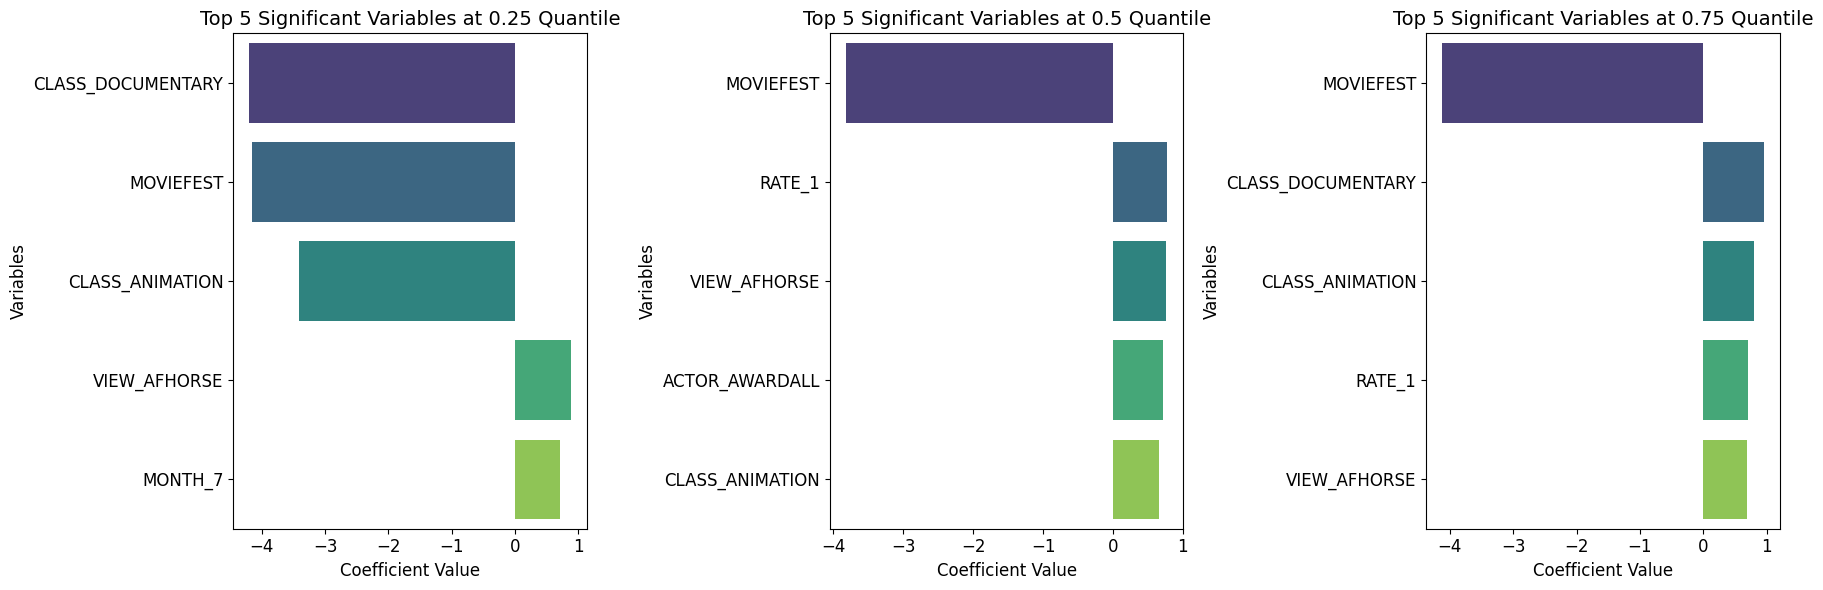

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg


# 定義自變數和應變數
X = data[['LN_AUDIENCE', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 
          'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 
          'MOVIE_LENGTH', 'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 
          'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 
          'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 
          'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 
          'THEATER_1', 'THEATER_2', 'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]
y = data['IMDB_RATING']

# 分量迴歸並挑選前五個重要變數
quantiles = [0.25, 0.5, 0.75]
top_vars = {}

for q in quantiles:
    model = QuantReg(y, X).fit(q=q)
    params = model.params
    pvalues = model.pvalues
    significant_params = params[pvalues < 0.05]
    top5 = significant_params.abs().sort_values(ascending=False).head(5)
    top_vars[q] = top5.index

# 視覺化前五個重要變數
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, q in enumerate(quantiles):
    model = QuantReg(y, X).fit(q=q)
    top5_params = model.params[top_vars[q]]
    sns.barplot(x=top5_params.values, y=top5_params.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Top 5 Significant Variables at {q} Quantile', fontsize=14)
    axes[i].set_xlabel('Coefficient Value', fontsize=12)
    axes[i].set_ylabel('Variables', fontsize=12)
    axes[i].tick_params(labelsize=12)

plt.tight_layout()
plt.show()


## 在0.25、0.5和0.75分量回歸模型中，顯著影響IMDB評分的前五個變數。

1. 0.25分量：

    + CLASS_DOCUMENTARY: 紀錄片類型對IMDB評分有顯著負面影響。

    + MOVIEFEST: 影展電影對IMDB評分有顯著負面影響。
    + CLASS_ANIMATION: 動畫片類型對IMDB評分有顯著負面影響。
    + VIEW_AFHORSE: 金馬獎入圍後放映對IMDB評分有顯著正面影響。
    + MONTH_7: 7月上映的電影對IMDB評分有顯著正面影響。

2. 0.5分量：

    + MOVIEFEST: 影展電影對IMDB評分有顯著負面影響。

    + RATE_1: 普遍級電影對IMDB評分有顯著正面影響。
    + VIEW_AFHORSE: 金馬獎入圍後放映對IMDB評分有顯著正面影響。
    + ACTOR_AWARDALL: 演員獲獎數量對IMDB評分有顯著正面影響。
    + CLASS_ANIMATION: 動畫片類型對IMDB評分有顯著負面影響。

3. 0.75分量：

    + MOVIEFEST: 影展電影對IMDB評分有顯著負面影響。
    
    + CLASS_DOCUMENTARY: 紀錄片類型對IMDB評分有顯著負面影響。
    + CLASS_ANIMATION: 動畫片類型對IMDB評分有顯著負面影響。
    + RATE_1: 普遍級電影對IMDB評分有顯著正面影響。
    + VIEW_AFHORSE: 金馬獎入圍後放映對IMDB評分有顯著正面影響。

## 0.25
+ MOVIEFEST 是否為影展片 : 對 IMDB 評分有顯著的負面影響，係數為 **-4.5288**。
+ CLASS_DARMA 電影類型_劇情 : 對 IMDB 評分有顯著的正面影響，係數為 **0.4579**。
+ DIRECTOR_AWARD: 對 IMDB 評分有顯著的正面影響，係數為 0.1327。
+ LN_AUDIENCE: 對 IMDB 評分有顯著的正面影響，係數為 0.0787。

## 0.5 
+ MOVIEFEST: 對 IMDB 評分有顯著的負面影響，係數為 **-4.7638**。
+ CLASS_DARMA: 對 IMDB 評分有顯著的正面影響，係數為 **0.5122**。
+ DIRECTOR_AWARD: 對 IMDB 評分有顯著的正面影響，係數為 0.0541。
+ LN_AUDIENCE: 對 IMDB 評分有顯著的正面影響，係數為 0.0712。

## 0.75
+ MOVIEFEST: 對 IMDB 評分有顯著的負面影響，係數為 **-5.1572**。
+ CLASS_DARMA: 對 IMDB 評分有顯著的正面影響，係數為 **0.4281**。
+ DIRECTOR_AWARD: 對 IMDB 評分沒有顯著影響，係數為 0.0011。
+ LN_AUDIENCE: 對 IMDB 評分有顯著的正面影響，係數為 0.0408。

                            OLS Regression Results                            
Dep. Variable:            LN_AUDIENCE   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     390.8
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:26:27   Log-Likelihood:            -1.2969e+05
No. Observations:               74232   AIC:                         2.594e+05
Df Residuals:                   74196   BIC:                         2.598e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8934      0.04

C:\Users\User\AppData\Local\Temp\ipykernel_25844\3913490449.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_vars['Coef.'], y=significant_vars.index, palette='viridis')


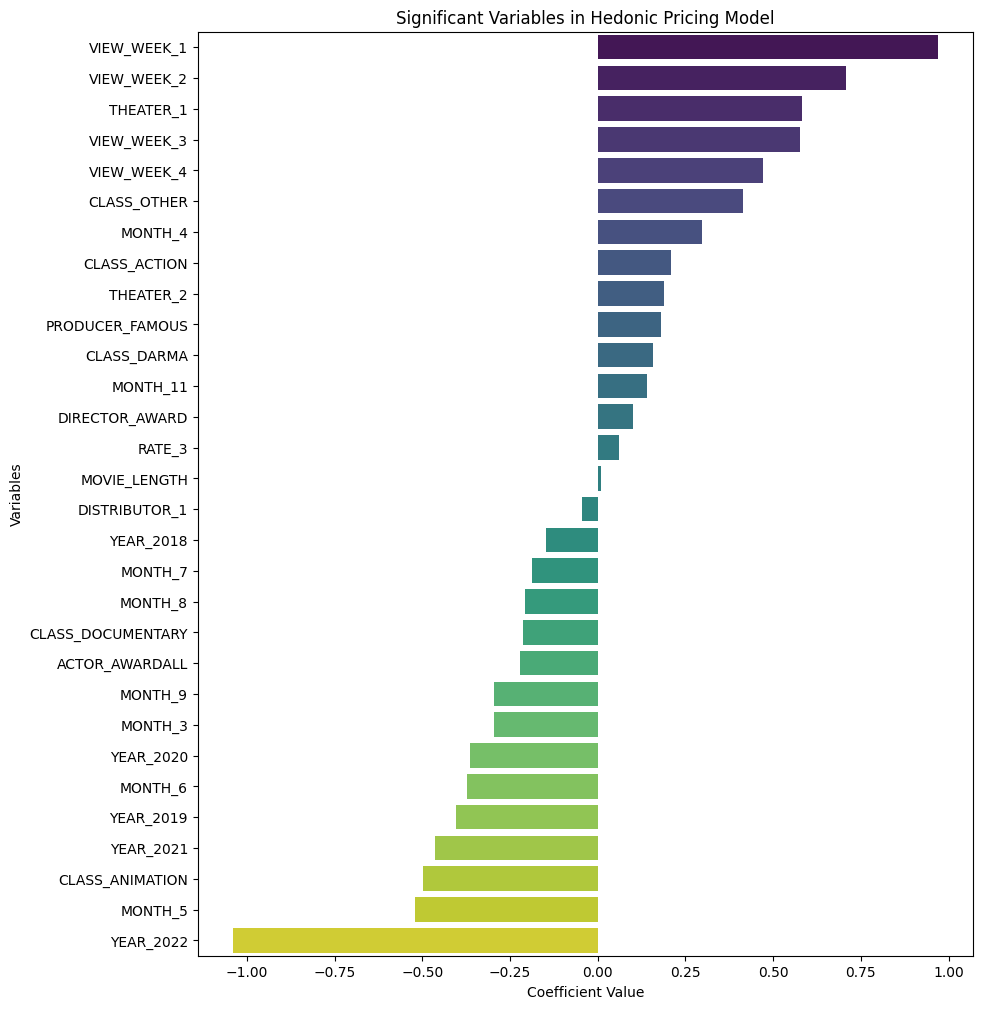

In [39]:
# 特徵價格法

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')

# Convert column names to uppercase
data.columns = map(str.upper, data.columns)

# 取對數的AUDIENCE
data['LN_AUDIENCE'] = np.log(data['AUDIENCE'] + 1)

# Hedonic Pricing Method Regression
X = data[['CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]
y = data['LN_AUDIENCE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Get the summary of the model
summary = model.summary2().tables[1]

# Select significant variables (p-value < 0.05) and sort by coefficient value
significant_vars = summary[summary['P>|t|'] < 0.05]
significant_vars = significant_vars.drop('const', errors='ignore')  # 去掉const
significant_vars = significant_vars.sort_values(by='Coef.', ascending=False)

# Plotting the significant variables
plt.figure(figsize=(10, 12))
sns.barplot(x=significant_vars['Coef.'], y=significant_vars.index, palette='viridis')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.title('Significant Variables in Hedonic Pricing Model')
plt.show()


In [40]:
# 計算VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              feature        VIF
0               const  89.632035
1         CLASS_DARMA   2.024079
2        CLASS_COMEDY   1.817078
3        CLASS_ACTION   1.230565
4   CLASS_DOCUMENTARY   1.954419
5     CLASS_ANIMATION   1.236166
6         CLASS_OTHER   1.822984
7        MOVIE_LENGTH   1.251427
8      DIRECTOR_AWARD   1.146194
9     PRODUCER_FAMOUS   1.370495
10     ACTOR_AWARDALL   1.107740
11          YEAR_2018   1.953190
12          YEAR_2019   1.928296
13          YEAR_2020   2.372359
14          YEAR_2021   2.475602
15          YEAR_2022   2.368027
16            MONTH_2   1.653594
17            MONTH_3   1.427446
18            MONTH_4   1.339831
19            MONTH_5   1.276323
20            MONTH_6   1.226741
21            MONTH_7   1.301876
22            MONTH_8   1.435707
23            MONTH_9   1.565462
24           MONTH_10   1.542694
25           MONTH_11   1.510130
26        VIEW_WEEK_1   1.578990
27        VIEW_WEEK_2   1.550732
28        VIEW_WEEK_3   1.447649
29        

1. CLASS_DARMA: 對觀眾數量有顯著的正面影響，係數為 17.4217。
2. CLASS_DOCUMENTARY: 對觀眾數量有顯著的負面影響，係數為 -12.8812。
3. DIRECTOR_AWARD: 對觀眾數量有顯著的正面影響，係數為 10.7958。
4. YEAR_2022: 對觀眾數量有顯著的負面影響，係數為 -63.1345。